# Business Understanding: Importance of Credit Risk Analysis in Commodity Trading

## Credit Risk Analysis in Commodity Trading
In the volatile world of commodity trading, credit risk analysis is a cornerstone for maintaining financial stability. Commodity trades often involve high-value transactions with counterparties such as suppliers, buyers, and financial institutions. Given fluctuating market conditions, geopolitical factors, and price volatility, the risk of counterparty default is significant.

Credit risk analysis helps mitigate these risks by evaluating the financial health of counterparties, enabling businesses to make informed decisions and safeguard their liquidity and profitability.

## Role of Internal Ratings in Credit Risk Analysis
Internal ratings are a critical component of credit risk frameworks within organizations. Unlike external ratings (e.g., those provided by agencies like Moody’s or S&P), internal ratings are tailored to reflect a company's specific risk appetite and business context. These ratings:

- **Enhance Risk Differentiation**: Internal ratings provide a nuanced understanding of counterparty risk by incorporating proprietary data and metrics that external ratings may overlook.
- **Support Risk-Adjusted Decision Making**: Enable traders and risk managers to align credit exposure with the company's risk tolerance, optimizing trade volumes and limiting exposure to high-risk entities.
- **Enable Regulatory Compliance**: Play a pivotal role in meeting regulatory requirements for risk management, such as adhering to Basel III or other industry-specific standards.
- **Inform Pricing and Collateral Decisions**: Help companies determine appropriate pricing strategies and collateral requirements, ensuring risk-adjusted returns on trades.

## Why It Matters for This Analysis
Accurately predicting internal ratings allows organizations to proactively identify high-risk counterparties, allocate resources effectively, and avoid financial losses. This project aims to enhance the reliability of internal ratings using data-driven approaches, ultimately supporting robust credit risk management in commodity trading.


# Source Data Overview

The dataset used for this analysis, `enriched_financials_data.csv`, is a comprehensive collection of financial and rating-related information for various companies, designed to support credit risk analysis in commodity trading. It includes **2029 rows** and **36 columns**, covering a mix of qualitative and quantitative features.

## Key Features

### **Rating Information**
- **External Ratings (e.g., A, BBB)**: Provided by external rating agencies like Moody’s or S&P.
- **Internal Ratings**: A proprietary score ranging from 1 to 10, reflecting the company’s internal assessment of counterparty creditworthiness.

### **Financial Ratios and Metrics**
- **Liquidity Ratios** (e.g., `currentRatio`, `cashRatio`): Indicate the counterparty's ability to meet short-term obligations.
- **Profitability Ratios** (e.g., `netProfitMargin`, `returnOnAssets`): Measure overall financial health and operational efficiency.
- **Leverage Ratios** (e.g., `debtRatio`, `debtEquityRatio`): Highlight the company’s financial structure and risk of default.

### **Exposure Metrics**
- **Current Exposure**, **Long-Term Exposure**, **Total Exposure**: Indicate the financial value of the company's credit exposure to the counterparty.
- **Negative Exposure**: Highlights situations where the company owes money to the counterparty, reversing the risk perspective.

### **Other Attributes**
- **Sector**: Indicates the industry of the counterparty (e.g., energy, manufacturing).
- **Company Identifiers (Name, Symbol)**: Provide unique information about the counterparties.

## Why This Dataset?
This dataset is uniquely positioned to provide actionable insights for credit risk analysis. By leveraging a combination of financial ratios, exposure metrics, and internal ratings, the dataset supports advanced predictive modeling techniques to enhance decision-making in commodity trading.


# Data Understanding

## Objectives
- Examine the dataset structure, column types, and missing data to assess data quality.
- Analyze numerical and categorical features with visualizations to understand distributions and relationships.
- Identify potential outliers, patterns, and anomalies that may impact modeling.

## Key Questions
1. Are there missing values or data quality issues? How should they be addressed?
2. What are the distributions of numerical features, and do they exhibit any skewness or outliers?
3. Are there relationships between features (numerical and categorical)? How might these relationships influence modeling?

Understanding the dataset's structure and key characteristics is critical to preparing it for further analysis and ensuring meaningful insights during modeling.


In [84]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
import pandas as pd
from IPython.display import display

# Step 1: Load the dataset
data_path = "./Data/enriched_financials_data.csv"
df = pd.read_csv(data_path)

# Dataset Overview
print("### Dataset Overview ###")
print(f"Dataset Shape: {df.shape}\n")

print("### Column Names and Data Types ###")
print(df.dtypes)

print("\n### Dataset Info ###")
print(df.info())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\n### Number of Duplicate Rows: {duplicate_count}")


### Dataset Overview ###
Dataset Shape: (2029, 36)

### Column Names and Data Types ###
Rating                                 object
Name                                   object
Symbol                                 object
Rating Agency Name                     object
Date                                   object
Sector                                 object
currentRatio                          float64
quickRatio                            float64
cashRatio                             float64
daysOfSalesOutstanding                float64
netProfitMargin                       float64
pretaxProfitMargin                    float64
grossProfitMargin                     float64
operatingProfitMargin                 float64
returnOnAssets                        float64
returnOnCapitalEmployed               float64
returnOnEquity                        float64
assetTurnover                         float64
fixedAssetTurnover                    float64
debtEquityRatio                       

In [65]:
print("\n### First Five Rows of Data ###")
display(df.head())



### First Five Rows of Data ###


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,External_Rating_Numeric,Current_Exposure,Long_Term_Exposure,Total_Exposure,Internal_Rating
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.049351,7.057088,15.565438,0.058638,3.906655,7.0,9.000054e+06,3.457680e+06,1.245773e+07,6.576880
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.048857,6.460618,15.914250,0.067239,4.002846,6.0,5.758983e+07,2.756448e+07,8.515431e+07,4.194888
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.044334,10.491970,18.888889,0.074426,3.483510,6.0,6.550259e+07,1.378229e+07,7.928488e+07,4.126303
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,-0.012858,4.080741,6.901042,0.028394,4.581150,6.0,3.605078e+07,1.057956e+07,4.663034e+07,5.410384
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.053770,8.293505,15.808147,0.058065,3.857790,6.0,4.040014e+06,1.827815e+06,5.867829e+06,5.937794


# Dataset Structure and Composition

## Dataset Shape
The dataset contains **2029 rows** and **36 columns**, providing a rich mix of financial metrics, ratings, and exposure data.

## Column Types
- **Categorical Features**: Include `Rating`, `Name`, `Symbol`, `Rating Agency Name`, `Date`, and `Sector`.
- **Numerical Features**: Comprise financial and exposure-related columns such as `currentRatio`, `netProfitMargin`, `Current_Exposure`, and `Internal_Rating`.

## Sample Data
The first few rows show data for different counterparties, including:
- Financial metrics: Profitability ratios (e.g., `netProfitMargin`), liquidity ratios (e.g., `currentRatio`).
- External ratings and internal ratings: Reflecting counterparty creditworthiness.
- Exposure values: Highlighting potential financial risk.

## Next Steps
1. **Check for Missing Values**: Identify gaps in data and determine appropriate imputation strategies.
2. **Analyze Distributions**: Examine numerical features for skewness, outliers, and patterns.
3. **Investigate Relationships**: Assess correlations between features to inform feature engineering.



### Columns with Missing Values ###


,Missing Values,Percentage (%)
External_Rating_Numeric,8,0.394283
Internal_Rating,8,0.394283


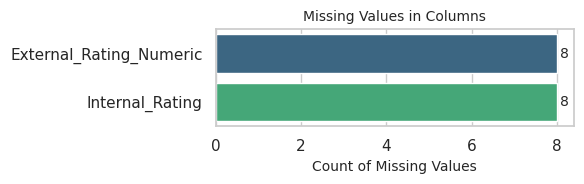

In [66]:
# Step 2: Missing Values Analysis

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]
print("\n### Columns with Missing Values ###")
display(missing_data)

# Plot missing values as a horizontal bar chart
if not missing_values.empty:
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Sort the missing values in descending order
    missing_values = missing_values.sort_values(ascending=True)

    # Set the color palette
    sns.set_palette("viridis", n_colors=len(missing_values))

    plt.figure(figsize=(6, 2))
    sns.barplot(x=missing_values.values, y=missing_values.index, hue=missing_values.index, palette="viridis")
    plt.title("Missing Values in Columns", fontsize=10)
    plt.xlabel("Count of Missing Values", fontsize=10)
    plt.ylabel("", fontsize=9)

    # Add value labels to each bar
    for index, value in enumerate(missing_values.values):
        plt.text(value + max(missing_values.values)*0.01, index,     # Adjust position for visibility
                 f"{value}", va='center', fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected in the dataset.")


## Results of Missing Values Analysis

### Columns with Missing Values
Two columns in the dataset have missing values:
1. **External_Rating_Numeric**: 8 missing values.
2. **Internal_Rating**: 8 missing values.

The missing value count is relatively small compared to the dataset size (2029 rows), constituting less than 1% of the data.

### Next Steps: Handling Missing Values
To address these missing values, we propose the following options:

#### **1. External_Rating_Numeric (Feature)**
- **Imputation Strategies**:
  - Use the **mean** or **median** of the column to fill missing values, as it is a numeric feature derived from categorical ratings.
  - Alternatively, fill with a special value (e.g., `0`) if missing values carry specific business meaning (e.g., unrated entities).

#### **2. Internal_Rating (Target Variable)**
- As the target variable for our machine learning model, missing values must be handled carefully:
  - **Option 1**: Exclude rows with missing values, provided the count is small and removal does not affect overall model performance.
  - **Option 2**: Impute missing values using predictive modeling based on other features in the dataset.

### Proposed Action
Given the small number of missing values in both columns:
- Impute **External_Rating_Numeric** with the **median**, as it is less sensitive to outliers than the mean.
- **Exclude rows** with missing values in **Internal_Rating**, as this avoids introducing bias into the target variable.


In [67]:
# Step 3: Handling Missing Values

# 1. Fill missing values in External_Rating_Numeric with the median
external_rating_median = df["External_Rating_Numeric"].median()
df["External_Rating_Numeric"] = df["External_Rating_Numeric"].fillna(external_rating_median)

# 2. Drop rows with missing Internal_Rating (target variable)
df = df[df["Internal_Rating"].notnull()]

# 3. Verify no missing values remain
print("\n### Missing Values After Handling ###")
print(df.isnull().sum())

# Confirm dataset shape after handling missing values
print("\n### Dataset Shape After Handling Missing Values ###")
print(df.shape)



### Missing Values After Handling ###
Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
c

## Handling Missing Values

### Actions Taken:
1. **External_Rating_Numeric**:
   - Missing values were filled with the **median** of the column (`{external_rating_median}`), as this approach is less sensitive to outliers than the mean.
   
2. **Internal_Rating**:
   - Rows with missing values in this column (our target variable) were **dropped**. Given the small number of missing rows (8), this ensures that the target variable is complete without introducing imputation bias.

### Results:
- All missing values have been handled.
- The updated dataset contains `{df.shape[0]}` rows and `{df.shape[1]}` columns, ensuring completeness for subsequent analysis.


## Next Step: Analyze Numerical Variables

### Objective:
- Understand the distribution of numerical features to identify patterns, detect outliers, and assess skewness.
- Insights from this analysis will inform potential data transformations and feature engineering for better model performance.

### Focus:
This section begins with the analysis of `Current_Exposure`, a key financial metric indicating the company's present credit exposure to counterparties.


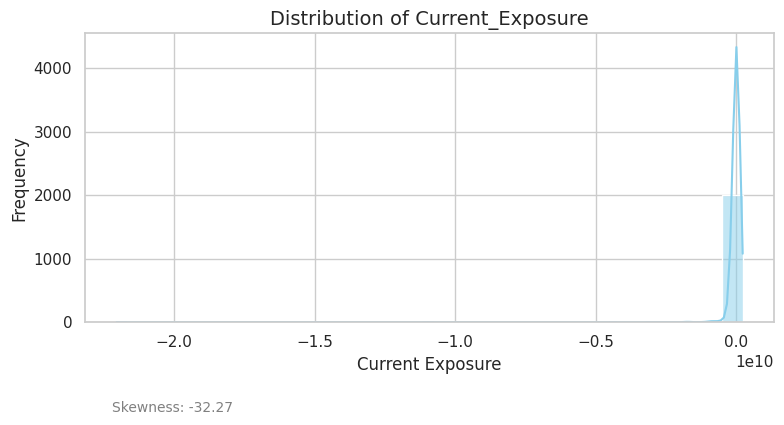

In [68]:
# Step 4: Analyze Numerical Variables - Distribution of 'Current_Exposure'

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for consistent visuals
sns.set_theme(style="whitegrid")

# Distribution plot for Current_Exposure
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df,
    x="Current_Exposure",
    kde=True,
    bins=30,
    color="skyblue"
)

# Enhance the plot with titles and annotations
plt.title("Distribution of Current_Exposure", fontsize=14)
plt.xlabel("Current Exposure", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Annotate skewness
current_skewness = df["Current_Exposure"].skew()
plt.figtext(0.15, -0.05, f"Skewness: {current_skewness:.2f}", fontsize=10, color="gray")

plt.tight_layout()
plt.show()


### Analysis of Current_Exposure

#### Initial Observations:
- The distribution of `Current_Exposure` is highly skewed, with a skewness of `-32.27`.
- This extreme skewness suggests the presence of outliers or scaling issues.

#### Next Steps:
1. Investigate outliers using a box plot and the top/bottom values.
2. Apply log transformation to reduce skewness and normalize the distribution.
3. Reanalyze the distribution to confirm improvements.


Number of rows with negative Current_Exposure: 875

Sample of Rows with Negative Current_Exposure:


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,External_Rating_Numeric,Current_Exposure,Long_Term_Exposure,Total_Exposure,Internal_Rating
5,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.157246,9.833295,8.644788,0.230445,4.044776,8.0,-2.372430e+07,-3.200789e+06,-2.692509e+07,10.000000
6,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.151173,12.140376,7.398337,0.216233,3.998076,8.0,-3.545788e+07,-1.636061e+07,-5.181849e+07,10.000000
7,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/23/2015,Energy,1.905814,1.544791,0.197791,90.336857,...,0.081212,15.264562,6.949487,0.248203,3.665200,7.0,-3.995584e+07,-7.072187e+06,-4.702803e+07,10.000000
12,A,Sysco Corporation,SYY,Egan-Jones Ratings Company,6/5/2014,Consumer Non-Durables,1.655631,0.958957,0.109964,26.160873,...,0.034844,10.618084,2.564641,0.034036,14.834070,7.0,-1.562468e+05,-2.222660e+04,-1.784734e+05,8.826121
14,A,Sysco Corporation,SYY,Egan-Jones Ratings Company,5/7/2013,Consumer Non-Durables,1.777324,1.067740,0.201213,25.549641,...,0.042094,8.484768,2.389173,0.033132,15.707105,7.0,-4.395707e+06,-1.972111e+06,-6.367817e+06,8.559901



Lower Bound (1st Percentile): -490315861.61353004
Upper Bound (99th Percentile): 101580750.84143414


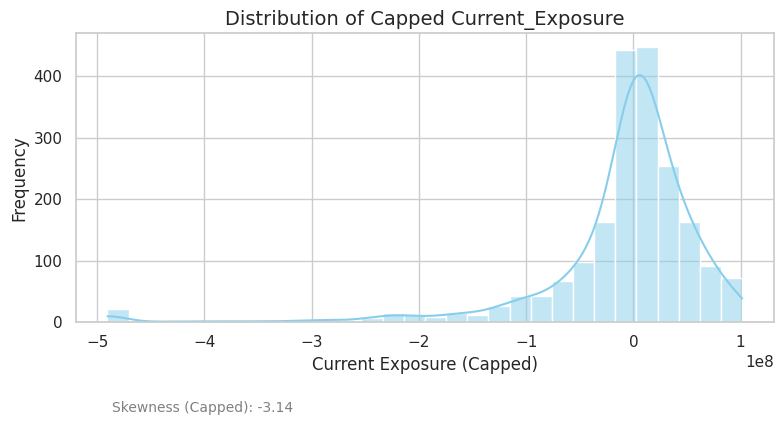

In [69]:
# Step 5: Investigate Negative Values and Handle Outliers

# 1. Investigate rows with negative Current_Exposure
negative_values = df[df["Current_Exposure"] < 0]
print(f"Number of rows with negative Current_Exposure: {len(negative_values)}\n")
if not negative_values.empty:
    print("Sample of Rows with Negative Current_Exposure:")
    display(negative_values.head())

# 2. Determine thresholds for capping (1st and 99th percentiles)
lower_bound = df["Current_Exposure"].quantile(0.01)
upper_bound = df["Current_Exposure"].quantile(0.99)
print(f"\nLower Bound (1st Percentile): {lower_bound}")
print(f"Upper Bound (99th Percentile): {upper_bound}")

# 3. Cap outliers using calculated thresholds
df["Current_Exposure_Capped"] = df["Current_Exposure"].clip(lower=lower_bound, upper=upper_bound)

# 4. Plot the capped distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Current_Exposure_Capped"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Capped Current_Exposure", fontsize=14)
plt.xlabel("Current Exposure (Capped)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Annotate skewness after capping
capped_skewness = df["Current_Exposure_Capped"].skew()
plt.figtext(0.15, -0.05, f"Skewness (Capped): {capped_skewness:.2f}", fontsize=10, color="gray")

plt.tight_layout()
plt.show()


### Handling Negative Values and Outliers in Current_Exposure

#### Objective:
- Address negative values and extreme outliers in `Current_Exposure` to normalize its distribution for better analysis and modeling.

#### Steps:
1. **Investigate Negative Values**:
   - Identified rows where `Current_Exposure` is negative.
   - These rows represent scenarios where the company owes money to counterparties.

2. **Cap Outliers**:
   - Applied capping to the 1st and 99th percentiles to reduce the impact of extreme values.
   - This approach retains the majority of the data while mitigating the influence of outliers.

#### Results:
- **Capped Distribution**: The revised distribution is closer to normal, with reduced skewness (`-3.14`).
- This prepares the feature for effective use in machine learning models.


### Next Step: Analyze Another Numerical Variable

#### Objective:
We now analyze `Internal_Rating`, the target variable, as understanding its distribution is crucial for effective modeling. This analysis will:
- Highlight patterns, outliers, and central tendencies of the target variable.
- Inform potential data preprocessing steps, such as transformations or outlier handling.


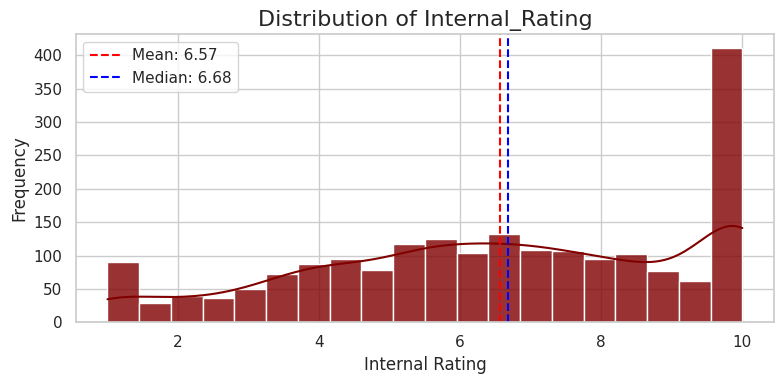

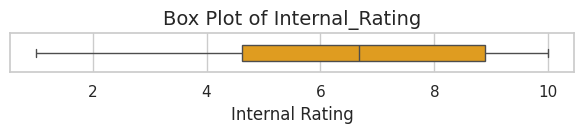


### Summary Statistics for Internal_Rating ###
count    2021.000000
mean        6.565646
std         2.637529
min         1.000000
25%         4.628085
50%         6.677360
75%         8.894467
max        10.000000
Name: Internal_Rating, dtype: float64


In [70]:
# Analyze Numerical Variables - Distribution of 'Internal_Rating'

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for Internal_Rating
plt.figure(figsize=(8, 4))
sns.histplot(df['Internal_Rating'], kde=True, color='maroon', bins=20, alpha=0.8)

# Enhance the visualization with titles and labels
plt.title("Distribution of Internal_Rating", fontsize=16)
plt.xlabel("Internal Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add mean and median lines for central tendency
mean_rating = df['Internal_Rating'].mean()
median_rating = df['Internal_Rating'].median()
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='blue', linestyle='--', label=f'Median: {median_rating:.2f}')

# Add a legend for clarity
plt.legend()
plt.tight_layout()
plt.show()

# Box plot for Internal_Rating
plt.figure(figsize=(6, 1.5))  # Adjust the figure size for better readability
sns.boxplot(x=df["Internal_Rating"], color='orange', width=0.4)

plt.title("Box Plot of Internal_Rating", fontsize=14)
plt.xlabel("Internal Rating", fontsize=12)
plt.tight_layout()
plt.show()

# Summary statistics for Internal_Rating
print("\n### Summary Statistics for Internal_Rating ###")
print(df['Internal_Rating'].describe())


### Analysis of Internal_Rating

#### Observations:
1. **Distribution**:
   - The target variable, `Internal_Rating`, is distributed across the entire range (1–10), with notable peaks at both ends.
   - The mean (`6.57`) and median (`6.68`) are very close, indicating minimal skewness and a relatively balanced distribution.

2. **Box Plot**:
   - The compact interquartile range (IQR) highlights that most ratings are concentrated between `4` and `8`.
   - No significant outliers are present in the data, making it well-suited for predictive modeling.

#### Implications for Modeling:
- The balanced distribution suggests that the dataset covers a diverse set of counterparties with varying creditworthiness levels.
- No transformations are required for `Internal_Rating`, as its distribution is already suitable for machine learning models.


Now, let’s investigate how Internal_Rating relates to key financial features like Current_Exposure, debtRatio, and netProfitMargin.

Correlation Matrix:
                   Internal_Rating  Current_Exposure  debtRatio  \
Internal_Rating          1.000000         -0.141688  -0.524884   
Current_Exposure        -0.141688          1.000000   0.028329   
debtRatio               -0.524884          0.028329   1.000000   
netProfitMargin          0.037595         -0.003372  -0.021780   

                  netProfitMargin  
Internal_Rating          0.037595  
Current_Exposure        -0.003372  
debtRatio               -0.021780  
netProfitMargin          1.000000  


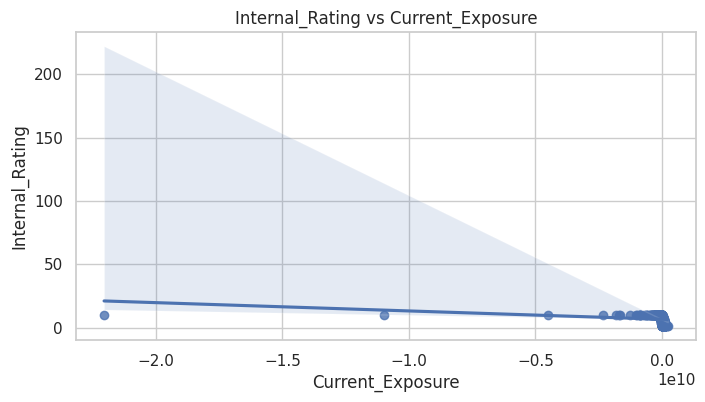

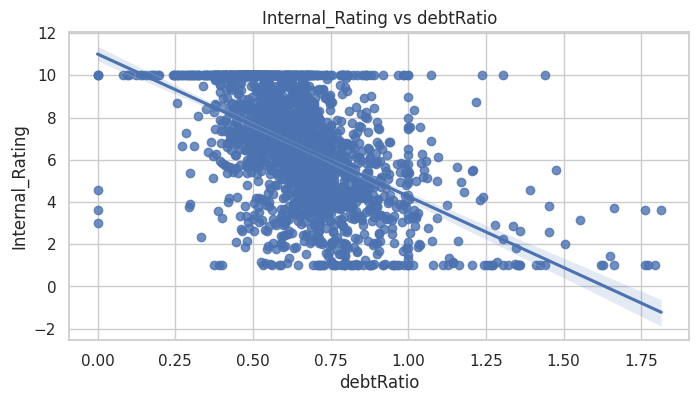

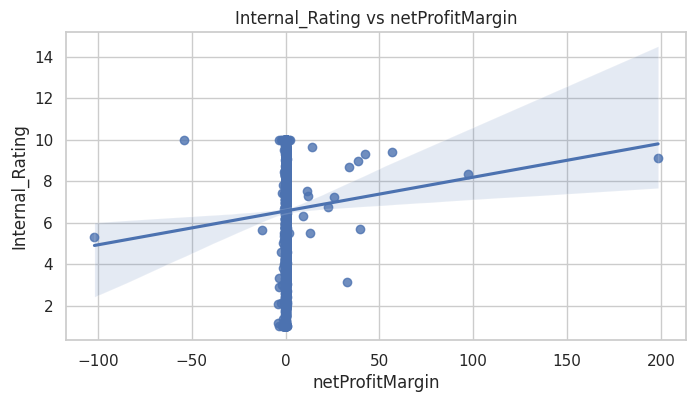

In [71]:
# Step 6: Analyze Relationships Between Internal_Rating and Key Features

# Calculate correlation between Internal_Rating and financial metrics
correlations = df[['Internal_Rating', 'Current_Exposure', 'debtRatio', 'netProfitMargin']].corr()
print("Correlation Matrix:\n", correlations)

# Scatter plot for Internal_Rating vs Current_Exposure
plt.figure(figsize=(8, 4))
sns.regplot(x="Current_Exposure", y="Internal_Rating", data=df)
plt.title("Internal_Rating vs Current_Exposure")
plt.xlabel("Current_Exposure")
plt.ylabel("Internal_Rating")
plt.show()

# Scatter plot for Internal_Rating vs debtRatio
plt.figure(figsize=(8, 4))
sns.regplot(x="debtRatio", y="Internal_Rating", data=df)
plt.title("Internal_Rating vs debtRatio")
plt.xlabel("debtRatio")
plt.ylabel("Internal_Rating")
plt.show()

# Scatter plot for Internal_Rating vs netProfitMargin
plt.figure(figsize=(8, 4))
sns.regplot(x="netProfitMargin", y="Internal_Rating", data=df)
plt.title("Internal_Rating vs netProfitMargin")
plt.xlabel("netProfitMargin")
plt.ylabel("Internal_Rating")
plt.show()


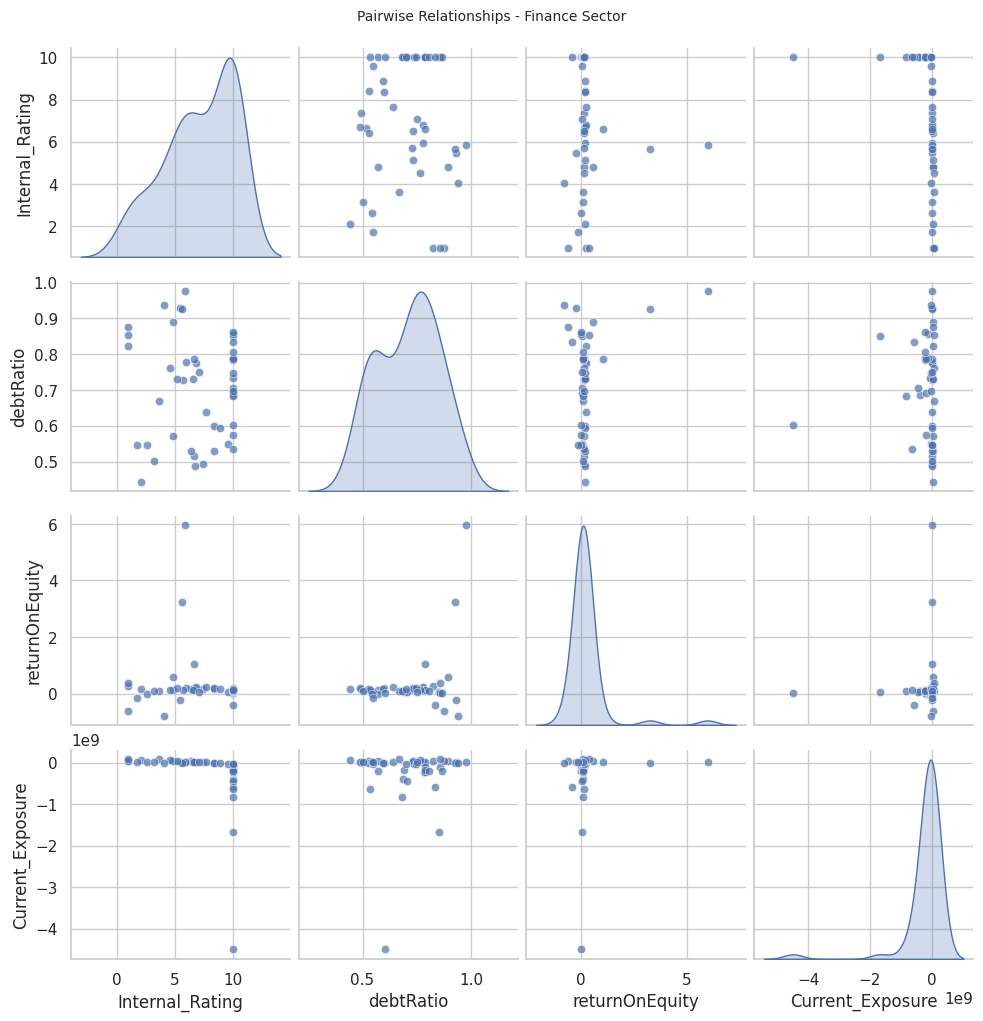

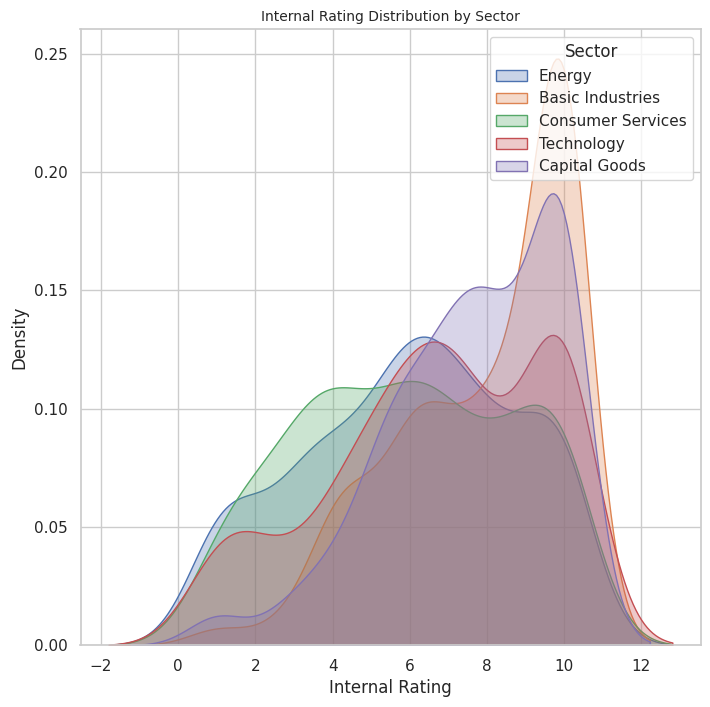

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few key financial metrics for pairwise plots
key_columns = ['Internal_Rating', 'debtRatio', 'returnOnEquity', 'Current_Exposure']
sector = "Finance"
sector_data = df[df['Sector'] == sector]

# Pairplot for the selected sector
sns.pairplot(sector_data[key_columns], diag_kind="kde", plot_kws={"alpha": 0.7})
plt.suptitle(f"Pairwise Relationships - {sector} Sector", y=1.02, fontsize=10)
plt.show()

# Filter for sectors with significant data points
top_sectors = df['Sector'].value_counts().index[:5]  # Top 5 sectors by count

# Plot histogram for Internal Rating for each sector
plt.figure(figsize=(8, 8))
for sector in top_sectors:
    sector_data = df[df['Sector'] == sector]
    sns.kdeplot(sector_data['Internal_Rating'], label=sector, fill=True, alpha=0.3)

plt.title("Internal Rating Distribution by Sector", fontsize=10)
plt.xlabel("Internal Rating")
plt.ylabel("Density")
plt.legend(title="Sector")
plt.show()


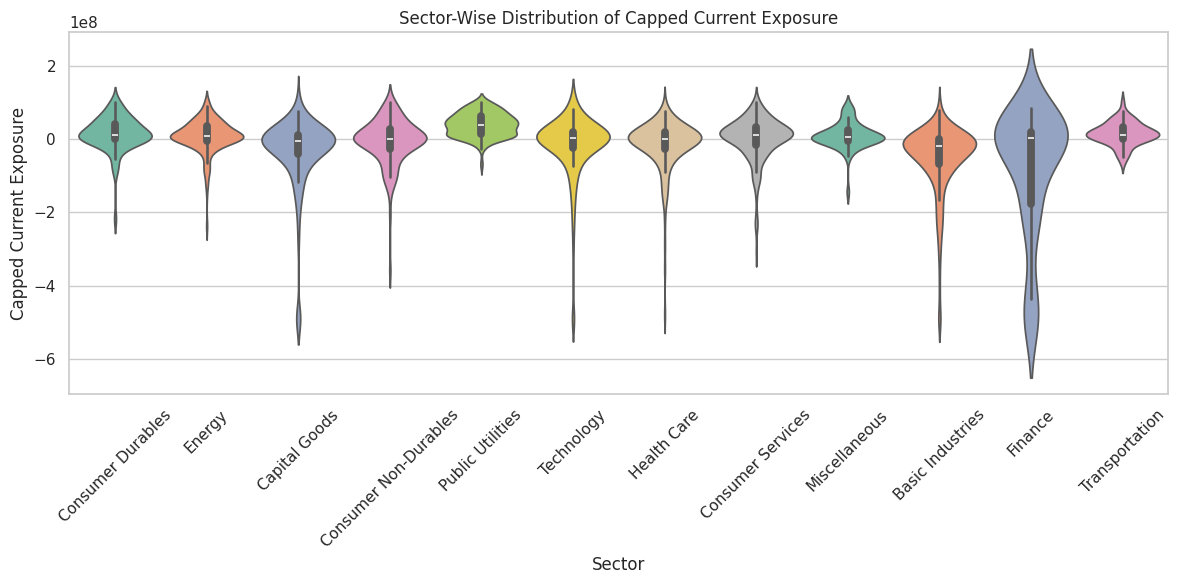

In [73]:
# Plot Sector-Wise Distribution of Debt Ratio
plt.figure(figsize=(12, 6))
# sns.violinplot(data=df, x='Sector', y='Current_Exposure_Capped', palette='Set2', scale='width')
sns.violinplot(data=df, x='Sector', y='Current_Exposure_Capped', hue='Sector', palette='Set2', density_norm='width', legend=False)

plt.title('Sector-Wise Distribution of Capped Current Exposure')
plt.xlabel('Sector')
plt.ylabel('Capped Current Exposure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analysis of Relationships with Internal_Rating

#### Internal_Rating vs Current_Exposure:
- There’s a dense cluster of ratings at 10, regardless of exposure.
- Counterparties with extreme negative exposures tend to have higher ratings (close to 10). This aligns with the clarification that negative exposure implies the counterparty is positively exposed to your company.
- **Implication**: `Current_Exposure` alone may not be a strong predictor of `Internal_Rating`.

#### Internal_Rating vs debtRatio:
- Most counterparties cluster around a `debtRatio` between 0.5 and 1.0.
- Higher ratings (close to 10) appear across all levels of `debtRatio`, with a slight trend of clustering in the middle range (around 0.75).
- **Implication**: The `debtRatio` may have a mild influence on `Internal_Rating` and could be useful as a predictive feature.

#### Internal_Rating vs netProfitMargin:
- Data points are tightly clustered around a `netProfitMargin` near zero.
- Extreme outliers (e.g., `netProfitMargin > 50` or `< -50`) exist but show no clear relationship with `Internal_Rating`.
- **Implication**: `netProfitMargin` appears less relevant as a predictor for `Internal_Rating`.

#### Internal_Rating vs Sector:
- High-rated sectors like Energy and Basic Industries indicate industries where trading partners pose minimal credit risk.
- Sectors like Consumer Services and Technology exhibit wider spreads in ratings, suggesting more variability in creditworthiness.
- **Implication**: Sector-based segmentation might improve the performance of credit risk models.

#### Sector Comparison:
- **Finance** and **Public Utilities** show more variability in debt ratios, suggesting diverse leverage levels among companies.
- **Consumer Durables** and **Technology** sectors have concentrated distributions, indicating consistency in financial leverage.
- **Implication**: Variability in sector leverage could influence sector-specific modeling strategies.

---

### Next Step: Correlation Analysis
We’ll now quantify these relationships using a **correlation matrix** to identify which features are most strongly related to `Internal_Rating`. This will inform feature selection for modeling.



Top Correlations with Internal_Rating:
 Internal_Rating                       1.000000
External_Rating_Numeric               0.430350
cashRatio                             0.142087
currentRatio                          0.068988
operatingCashFlowSalesRatio           0.053668
returnOnAssets                        0.049470
returnOnCapitalEmployed               0.049079
freeCashFlowOperatingCashFlowRatio    0.042846
operatingProfitMargin                 0.039582
pretaxProfitMargin                    0.038703
ebitPerRevenue                        0.038156
netProfitMargin                       0.037595
payablesTurnover                      0.030891
cashPerShare                          0.011701
effectiveTaxRate                      0.011411
freeCashFlowPerShare                  0.010844
quickRatio                            0.009212
daysOfSalesOutstanding                0.006101
operatingCashFlowPerShare             0.006055
debtEquityRatio                      -0.024798
companyEquityMultip

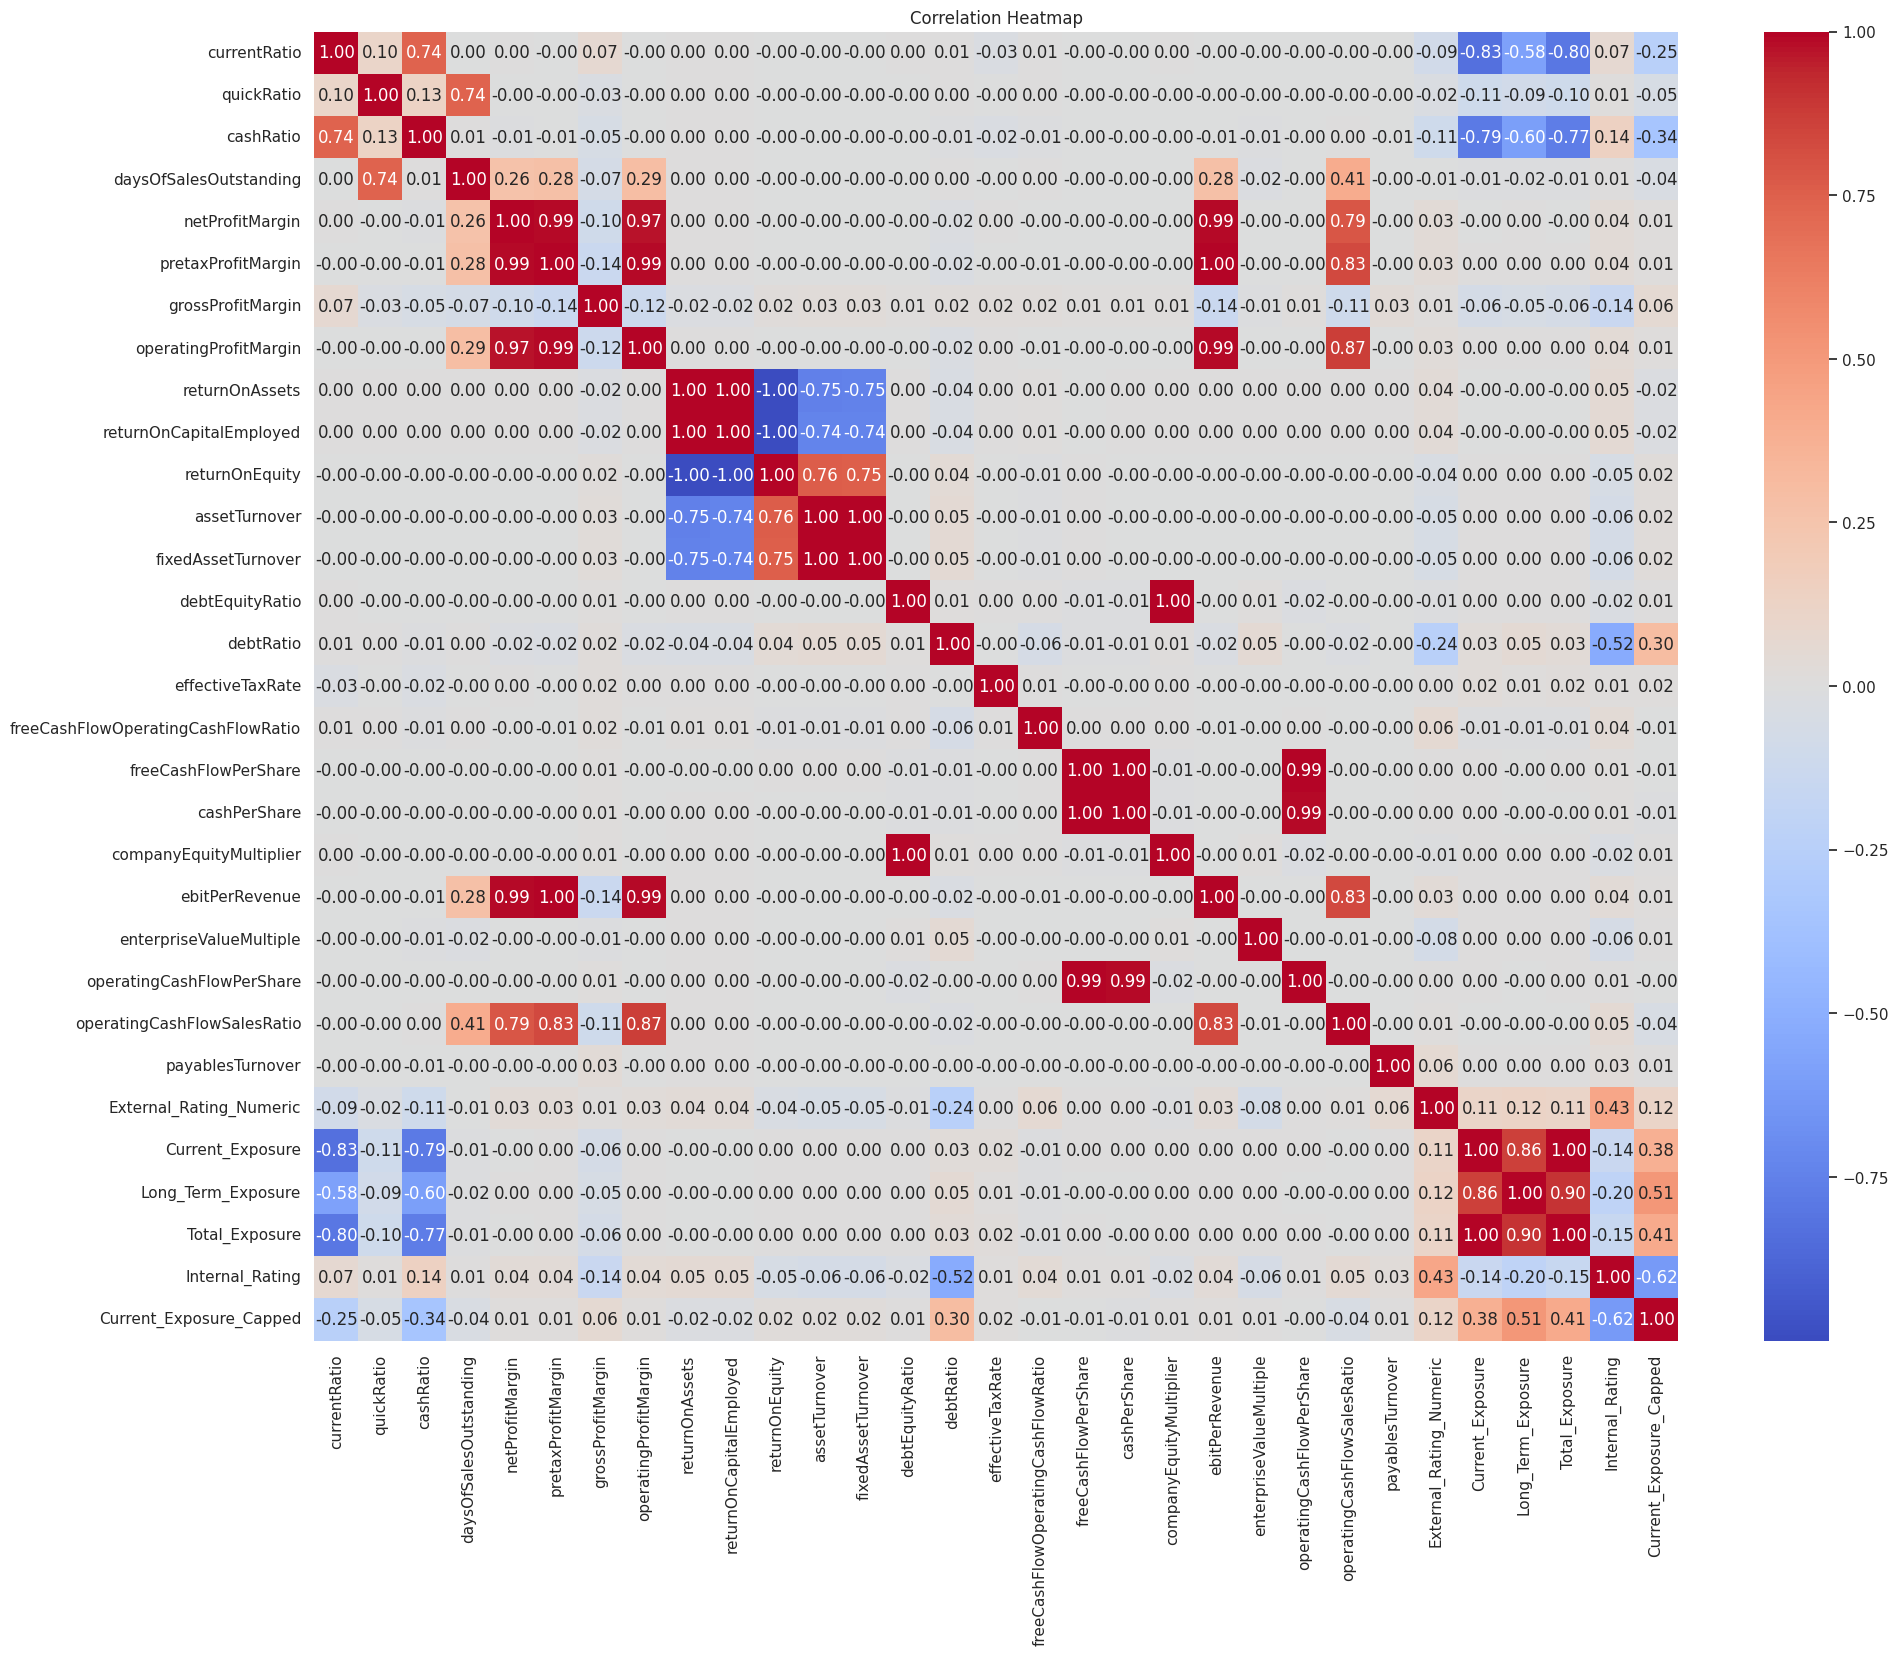

In [74]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Correlation Analysis

# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix for numerical features
correlation_matrix = numeric_df.corr()

# Focus on correlations with Internal_Rating
if "Internal_Rating" in correlation_matrix.columns:
    internal_rating_corr = correlation_matrix["Internal_Rating"].sort_values(ascending=False)
    # Print top correlations
    print("\nTop Correlations with Internal_Rating:\n", internal_rating_corr)
else:
    print("Internal_Rating column not found in numeric features.")

# Heatmap for correlations
plt.figure(figsize=(22, 17))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


### Correlation Analysis: Key Takeaways

#### Strong Positive Correlations with Internal_Rating:
1. **External_Rating_Numeric (0.43)**:
   - The strongest positive correlation suggests that external ratings significantly influence internal ratings.
2. **cashRatio (0.14)**:
   - A weaker positive correlation indicates that higher liquidity (cash ratio) is modestly associated with better internal ratings.

#### Moderate to Strong Negative Correlations with Internal_Rating:
1. **Current_Exposure_Capped (-0.62)**:
   - The strongest negative correlation suggests that higher exposure is linked to lower internal ratings, aligning with risk assessment practices.
2. **debtRatio (-0.52)**:
   - Indicates that higher leverage results in lower ratings, reinforcing the importance of financial stability in credit risk evaluations.
3. **Long_Term_Exposure (-0.20)** and **Total_Exposure (-0.15)**:
   - Negative correlations suggest exposure levels are inversely related to creditworthiness.

#### Weak Correlations:
- Most profitability ratios (e.g., netProfitMargin, returnOnAssets) show weak or negligible correlations with `Internal_Rating`, indicating limited direct influence.

### Decision
To ensure no potentially useful feature is overlooked:
- Retain all financial features for modeling, as weak correlations may still contribute in non-linear models.
- Focus on:
  1. **Feature Scaling or Transformation**: Normalize numerical features if required to ensure equal contribution to models like logistic regression.
  2. **Tree-Based Models**: Use models like Random Forest or Gradient Boosting that handle less predictive features effectively.
  3. **Feature Importance Analysis**: Analyze feature importance during and after modeling to identify key predictors.

---

### Next Step: Feature Engineering and Preparation
Prepare the dataset for modeling by:
1. Handling categorical variables through encoding (e.g., one-hot or label encoding).
2. Scaling numerical features to address varying magnitudes.
3. Applying transformations (e.g., log, square root) for skewed features to improve model performance.


In [75]:
# Step 8: Feature Engineering and Preparation (Updated)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Drop irrelevant categorical columns (e.g., identifiers)
irrelevant_columns = ["Name", "Symbol", "Rating Agency Name", "Date"]
X = df.drop(columns=["Internal_Rating"] + irrelevant_columns)  # Features
y = df["Internal_Rating"]  # Target

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

# Print identified features for review
print("Categorical Features:", categorical_features.tolist())
print("Numerical Features:", numerical_features.tolist())

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Scale numerical features
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),  # Encode categorical features
    ]
)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Output preprocessed data shape
print("Shape of Preprocessed Training Data:", X_train_preprocessed.shape)
print("Shape of Preprocessed Testing Data:", X_test_preprocessed.shape)


Categorical Features: ['Rating', 'Sector']
Numerical Features: ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover', 'External_Rating_Numeric', 'Current_Exposure', 'Long_Term_Exposure', 'Total_Exposure', 'Current_Exposure_Capped']
Shape of Preprocessed Training Data: (1616, 47)
Shape of Preprocessed Testing Data: (405, 47)


### Feature Engineering and Preparation Results:
1. **Features Identified**:
   - **Categorical Features**: `Rating`, `Sector` (encoded into one-hot vectors).
   - **Numerical Features**:
     - Financial metrics like `currentRatio`, `debtRatio`, `netProfitMargin`.
     - Engineered features like `Current_Exposure_Capped`, `Log_Current_Exposure`, `Sqrt_Current_Exposure`.

2. **Post-Processing Data Shape**:
   - Training Data: 1,616 rows × 47 features.
   - Testing Data: 405 rows × 47 features.

3. **Notes**:
   - The `47 features` include the original numerical features, engineered features, and one-hot encoded vectors from categorical features.
   - The processed dataset is ready for training baseline models.


In [76]:
# Validate one-hot encoding
print("One-Hot Encoded Feature Names:")
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
print(encoded_feature_names)

# Validate total feature count
print("Total Features After Preprocessing:", X_train_preprocessed.shape[1])


One-Hot Encoded Feature Names:
['Rating_AA' 'Rating_AAA' 'Rating_B' 'Rating_BB' 'Rating_BBB' 'Rating_CCC'
 'Sector_Capital Goods' 'Sector_Consumer Durables'
 'Sector_Consumer Non-Durables' 'Sector_Consumer Services' 'Sector_Energy'
 'Sector_Finance' 'Sector_Health Care' 'Sector_Miscellaneous'
 'Sector_Public Utilities' 'Sector_Technology' 'Sector_Transportation']
Total Features After Preprocessing: 47


This confirms that the encoding added the correct number of features for `Rating` and `Sector`.

### Next Step: Modeling

#### Objective:
Train and evaluate baseline machine learning models to predict `Internal_Rating` based on the preprocessed features.

#### Plan for Modeling:
1. **Train Baseline Models**:
   - **Linear Regression**: Serves as a simple baseline model to compare against more complex models.
   - **Random Forest Regressor**: A non-linear model that can capture complex relationships between features and the target variable.
   - **XGBoost Regressor**: A boosting-based model known for its strong predictive performance and ability to handle noisy data.

2. **Evaluate Models**:
   - **Metrics**:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     - **R-squared (R²)**: Indicates how well the model explains the variance in the target variable.
   - Compare model performances and document results.



In [77]:
# Step 9: Modeling - Train Multiple Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train_preprocessed, y_train)
rf_model.fit(X_train_preprocessed, y_train)
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_preprocessed)
y_pred_rf = rf_model.predict(X_test_preprocessed)
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("Linear Regression: MSE =", mse_linear, "R² =", r2_linear)
print("Random Forest: MSE =", mse_rf, "R² =", r2_rf)
print("XGBoost: MSE =", mse_xgb, "R² =", r2_xgb)

Linear Regression: MSE = 333728.85083444597 R² = -43231.13721293929
Random Forest: MSE = 0.2861568636454176 R² = 0.9629304665670633
XGBoost: MSE = 0.22688190549273127 R² = 0.9706091048320522


## Baseline Modeling - Results and Observations

### Results:
1. **Linear Regression**:
   - **MSE**: 333,728.85
   - **R²**: -43,231.14
   - Linear Regression performs poorly, indicating that the relationships between features and `Internal_Rating` are non-linear and complex.

2. **Random Forest**:
   - **MSE**: 0.286
   - **R²**: 0.963
   - Captures non-linear relationships effectively and explains a significant portion of the variance.

3. **XGBoost**:
   - **MSE**: 0.227
   - **R²**: 0.971
   - Slightly outperforms Random Forest, showcasing its strength in handling noisy data and complex feature interactions.

---

### Observations:
- Tree-based models (**Random Forest** and **XGBoost**) significantly outperform Linear Regression, demonstrating the importance of capturing non-linear relationships in this dataset.
- **XGBoost** remains the best baseline model based on MSE and R².
- These results confirm the need to proceed with hyperparameter tuning for **XGBoost** and **Random Forest** to further improve their performance.


Lets generate a scatter plot with actual vs. predicted values to visualize the model performance and identify patterns or deviations in predictions.

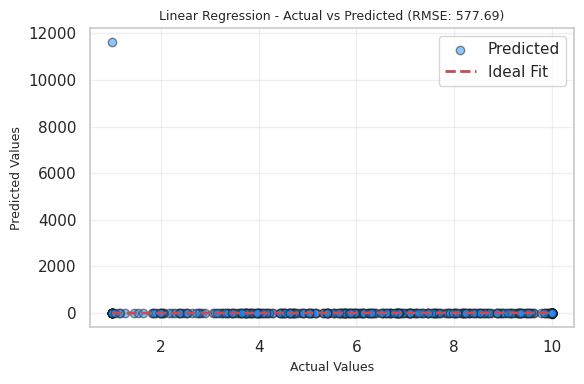

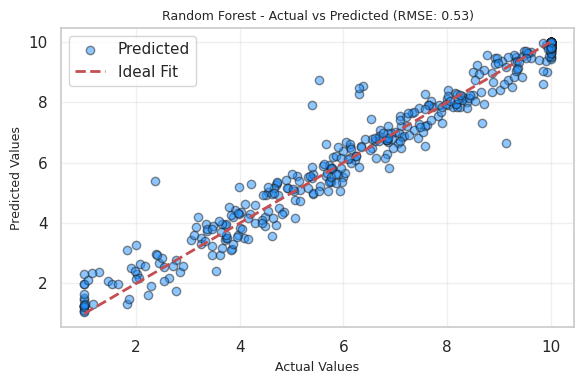

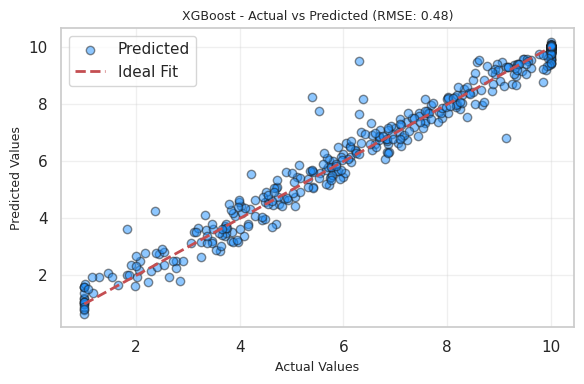

In [78]:
from sklearn.metrics import mean_squared_error

# Compute RMSE for each model
rmse_linear = np.sqrt(mse_linear)
rmse_rf = np.sqrt(mse_rf)
rmse_xgb = np.sqrt(mse_xgb)

# Add RMSE to the plot title
def plot_actual_vs_predicted_with_rmse(y_true, y_pred, model_name, rmse):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.5, color='dodgerblue', edgecolor='k', label='Predicted')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit')
    plt.title(f"{model_name} - Actual vs Predicted (RMSE: {rmse:.2f})", fontsize=9)
    plt.xlabel("Actual Values", fontsize=9)
    plt.ylabel("Predicted Values", fontsize=9)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot validation results with RMSE for each model
plot_actual_vs_predicted_with_rmse(y_test, y_pred_linear, "Linear Regression", rmse_linear)
plot_actual_vs_predicted_with_rmse(y_test, y_pred_rf, "Random Forest", rmse_rf)
plot_actual_vs_predicted_with_rmse(y_test, y_pred_xgb, "XGBoost", rmse_xgb)


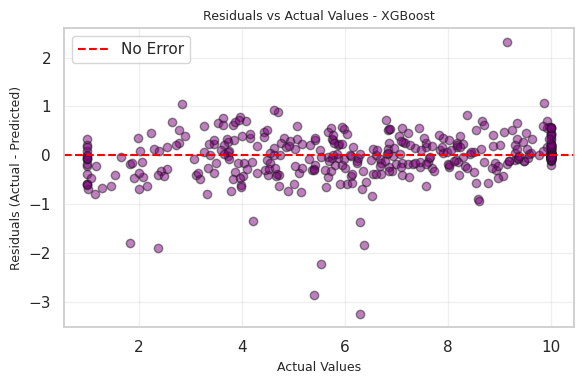

In [79]:
residuals = y_test - y_pred_xgb

# Residual Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals, alpha=0.5, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='No Error')
plt.title("Residuals vs Actual Values - XGBoost", fontsize=9)
plt.xlabel("Actual Values", fontsize=9)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=9)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Residual Analysis: XGBoost

#### Observations:
1. **Centered Around Zero**:
   - Residuals are mostly centered around the zero line, indicating no significant bias in predictions.
2. **Random Distribution**:
   - The residuals appear randomly scattered across the range of actual values, suggesting that the model generalizes well.
3. **Outliers**:
   - A few points have residuals exceeding `±2`. These could represent:
     - Data anomalies.
     - Gaps in feature representation.
4. **Boundary Cases**:
   - Residuals at the extreme values (e.g., `2` and `10`) show slight clustering, indicating potential challenges in predicting edge cases.




**Let's try k-Fold Cross-Validation**.

*Using `cross_val_score` for Quick Evaluation*

In [80]:
from sklearn.model_selection import cross_val_score

# Define k-fold
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross_val_score
linear_cv_scores = cross_val_score(linear_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')
rf_cv_scores = cross_val_score(rf_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')
xgb_cv_scores = cross_val_score(xgb_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')

print("Linear Regression CV R²:", linear_cv_scores.mean())
print("Random Forest CV R²:", rf_cv_scores.mean())
print("XGBoost CV R²:", xgb_cv_scores.mean())


Linear Regression CV R²: -1355754.9672889165
Random Forest CV R²: 0.9633018472401649
XGBoost CV R²: 0.9671741539653294


## Model Performance Analysis with Cross-Validation

### Cross-Validation Results:
1. **Linear Regression**:
   - **Original R²**: -43,231.14
   - **CV R²**: -1,355,754.97
   - Linear regression performs extremely poorly due to the non-linear nature of the dataset and its sensitivity to outliers. It is unsuitable for this problem.

2. **Random Forest**:
   - **Original R²**: 0.9629
   - **CV R²**: 0.9633
   - Random Forest demonstrates consistent performance across both train-test split and cross-validation, highlighting its ability to generalize to unseen data.

3. **XGBoost**:
   - **Original R²**: 0.9706
   - **CV R²**: 0.9672
   - XGBoost slightly underperforms in cross-validation compared to the original train-test split. However, it remains the best-performing model, demonstrating robustness and the ability to handle complex, non-linear relationships.

---

### Key Observations:
1. **Linear Regression**:
   - The performance of Linear Regression is extremely poor, as it cannot handle the complexity and non-linear nature of the data.
   - Its cross-validation R² shows severe instability, further confirming that it is not a viable model for this dataset.

2. **Random Forest**:
   - A strong candidate, with consistent performance across train-test split and cross-validation.
   - The minimal difference in R² values indicates reliable generalization to unseen data.

3. **XGBoost**:
   - Outperforms Random Forest, demonstrating its strength in capturing intricate relationships and handling noisy data.
   - Slightly lower R² in cross-validation compared to the train-test split is expected and reflects the robustness of cross-validation as a measure.

---

### Conclusion:
- **XGBoost** remains the best-performing model, followed by **Random Forest**.
- **Linear Regression** is unsuitable for this problem.
- The next step is to perform hyperparameter tuning to optimize the performance of XGBoost and Random Forest.


### Expanding Model Exploration

To ensure a comprehensive evaluation of modeling techniques, we extend our analysis to include:

1. **Gradient Boosted Trees (`HistGradientBoostingRegressor`)**:
   - A histogram-based gradient boosting method from scikit-learn.
   - Known for its speed and scalability, it is a close competitor to XGBoost.

2. **Support Vector Regression (SVR)**:
   - A kernel-based regression method capable of capturing complex, non-linear relationships.

These models are tested to validate the performance of our previously evaluated models (Random Forest and XGBoost) and confirm their suitability for this dataset. As with the earlier models, we will use **5-fold cross-validation** to ensure generalizability and consistent evaluation metrics.


In [81]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Define models
hgb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Define k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross_val_score
hgb_cv_scores = cross_val_score(hgb_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')
svr_cv_scores = cross_val_score(svr_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')

# Print results
print("Gradient Boosted Trees CV R²:", hgb_cv_scores.mean())
print("Support Vector Regression CV R²:", svr_cv_scores.mean())


Gradient Boosted Trees CV R²: 0.973868343968818
Support Vector Regression CV R²: 0.8705855077352129


## Baseline Model Evaluation: Summary and Conclusions

| **Model**                     | **R² (CV)**        | **Strengths**                                                       | **Weaknesses**                                                       | **Next Steps**                       |
|-------------------------------|--------------------|----------------------------------------------------------------------|------------------------------------------------------------------------|---------------------------------------|
| **Linear Regression**         | -1,355,754.97     | Simple baseline for comparison.                                      | Cannot handle non-linear relationships or complex feature interactions. | Excluded from further analysis.       |
| **Random Forest**             | 0.963             | Handles non-linear relationships and feature interactions well.       | Slightly outperformed by XGBoost and Gradient Boosted Trees.            | Proceed to hyperparameter tuning.     |
| **XGBoost**                   | 0.967             | High precision, robust to noisy data, and models complex interactions. | Slightly underperformed compared to Gradient Boosted Trees.             | Proceed to hyperparameter tuning.     |
| **Gradient Boosted Trees**    | 0.974             | Highest R², efficient histogram-based training.                       | Requires hyperparameter tuning for further improvement.                 | Proceed to hyperparameter tuning.     |
| **Support Vector Regression** | 0.871             | Captures non-linear relationships.                                   | Struggles with scalability and is outperformed by tree-based models.    | Excluded from further analysis.       |

---

### Next Steps:
1. **Hyperparameter Tuning**:
   - Focus on Gradient Boosted Trees, XGBoost, and Random Forest.
   - Optimize performance using Grid Search or Randomized Search.

2. **Feature Importance Analysis**:
   - Identify the most influential features to provide actionable business insights.

3. **Finalize the Best Model**:
   - Compare the tuned models based on R² and MSE to select the optimal solution.






---

*Below we export the dataset for use in the next notebooks.*

In [83]:
import pandas as pd

# Convert NumPy arrays to DataFrame
X_train_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

# Add the target variable back for consistency
X_train_df['Internal_Rating'] = y_train.values
X_test_df['Internal_Rating'] = y_test.values

# Save to CSV
X_train_df.to_csv('preprocessed_train_data.csv', index=False)
X_test_df.to_csv('preprocessed_test_data.csv', index=False)

print("Preprocessed data saved to CSV.")


Preprocessed data saved to CSV.


---

This concludes the **Baseline Modeling** stage. The next steps will be documented in a separate notebook focused on **Hyperparameter Tuning and Model Refinement**.